In [6]:
import seaborn as sns

tips = sns.load_dataset("tips") # 引入內建之資料集 tips 紀錄餐廳客人小費相關訊息

tips.head() #total_bill 總帳單, tip 小費 ,sex 性別, smoker是否抽菸,day 假期,time 甚麼時段的餐點


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
#查看版本
print(sns.__version__) #如小於 0.9 須更新 ""pip install seaborn -U

0.13.2


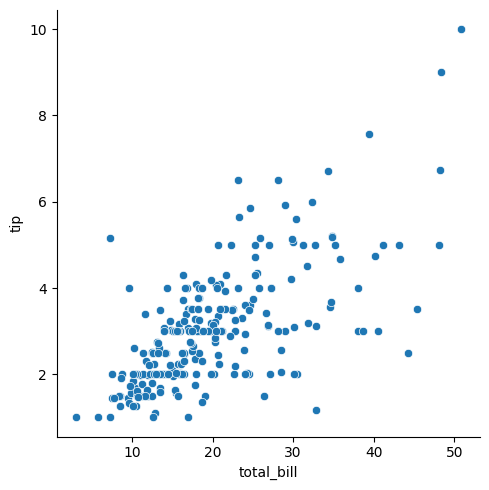

In [8]:
# 主要使用 data, x , 這三個參數 接受 pandas 提供的DataFrame 處理資料格式作為輸入
# x, y 則是data 裡面的column 名稱 與會至關係之變數
# x設定總消費(total_bill),y設定小費(tip),資料data
sns.relplot(x = "total_bill", y = "tip", data = tips)
# 由kind=’scatter’可以看出預設的繪製圖形為散布圖。

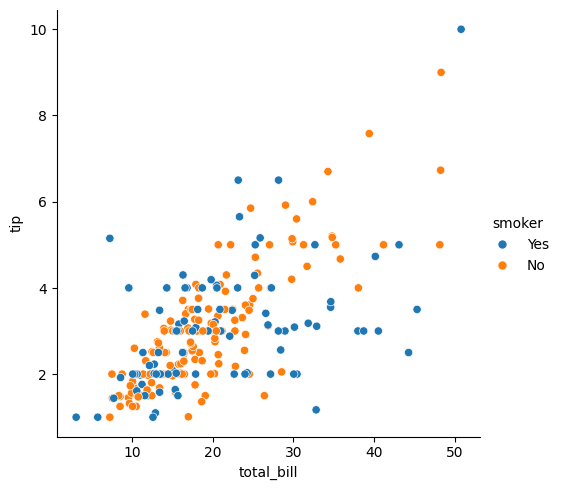

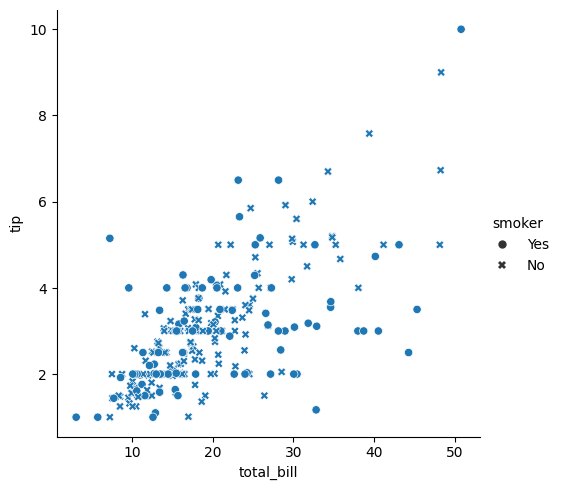

In [9]:
#使用 hub 與 style 表現更複雜之關係 #從圖形可以得知,當整體帳單金額越高 所的小費也更高
sns.relplot(x = "total_bill", y = "tip", hue="smoker", data = tips)
sns.relplot(x="total_bill", y="tip", style="smoker", data=tips)

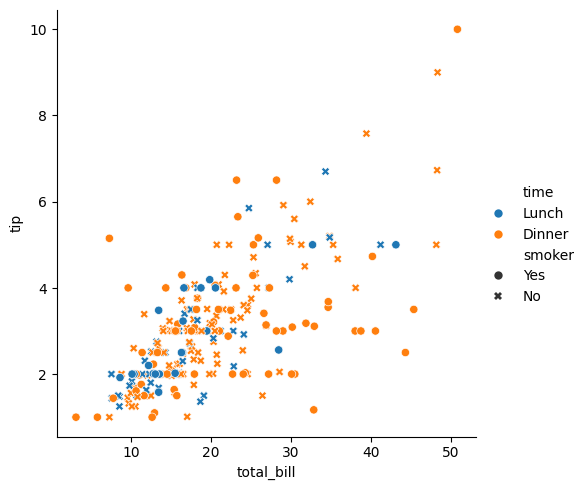

In [10]:
sns.relplot(x="total_bill", y="tip", style="smoker", hue='time', data=tips)

# Ref: https://pyecontech.com/2018/08/28/python_seaborn_installation_replot/

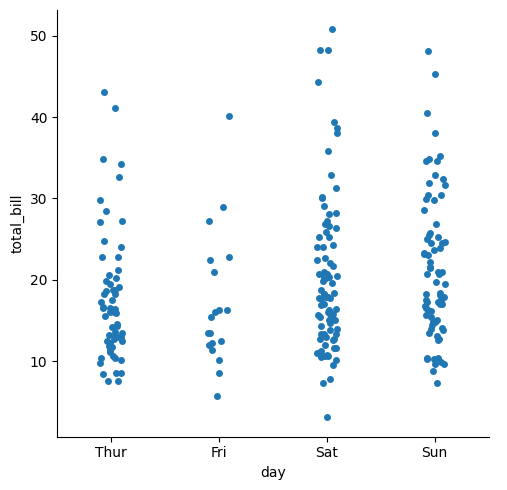

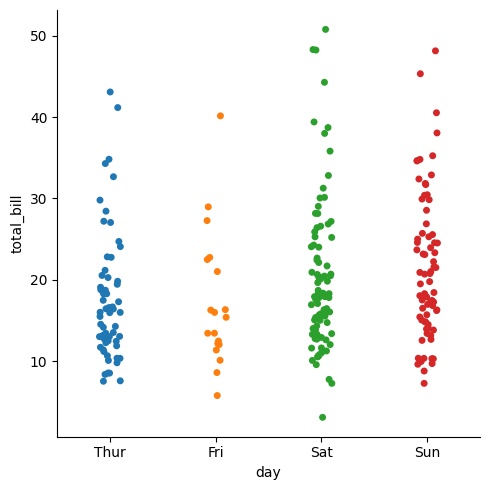

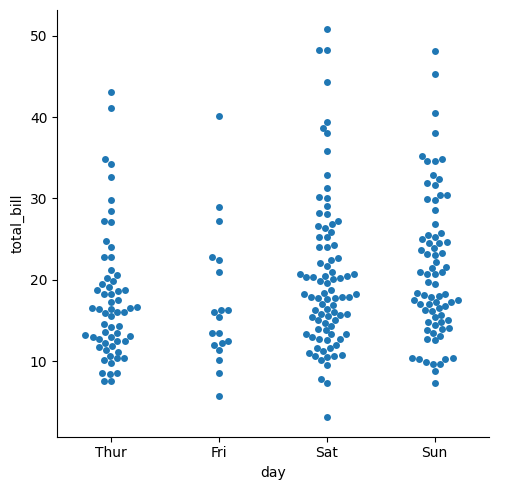

In [14]:
#假設 我們對於帳單金額與用餐時間奈天關係有係去 呼叫catplot
sns.catplot(x = "day", y = "total_bill", data = tips)

sns.catplot(x = "day", y = "total_bill", hue = "day", data=tips)

# 除了發現星期六的資料分佈最廣之外，也可以看出總帳單的金額似乎也叫其他天來得高。
sns.catplot(x = "day", y = "total_bill",kind = 'swarm', data=tips)

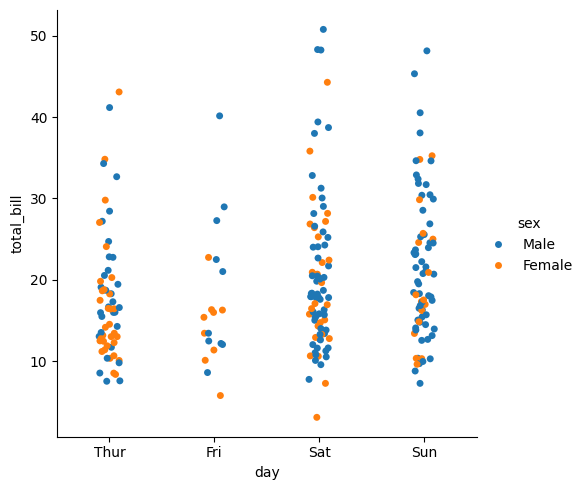

In [12]:
# Use hue parameter to specify the variable for coloring
sns.catplot(x="day", y="total_bill", hue="sex", data=tips)

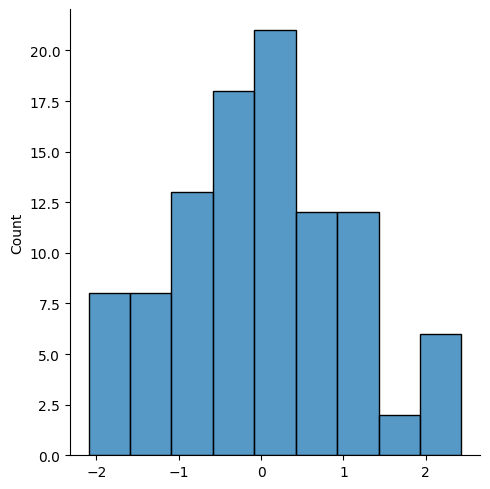

In [15]:
import numpy as np
x = np.random.normal(size=100)
sns.displot(x)

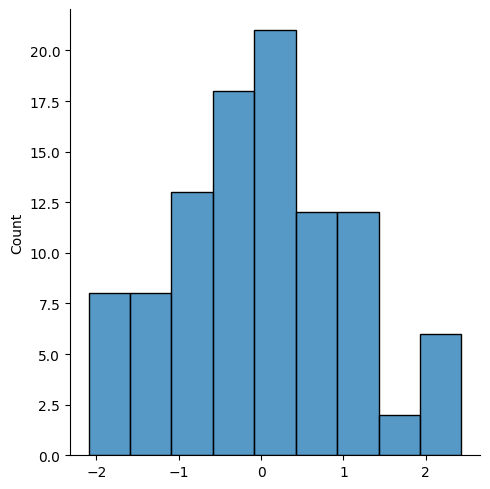

In [30]:
#只顯示直方圖
#sns.distplot(x, kde=False) # old code
#sns.displot(x, kind="hist")
sns.displot(x, kde = False)
# sns.histplot(x)

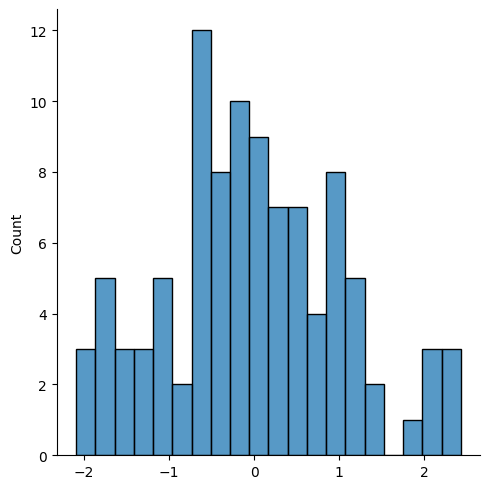

In [31]:
# 預設猜測最適合的長條(bin)數量，自己設定
sns.displot(x, bins=20, kde=False)

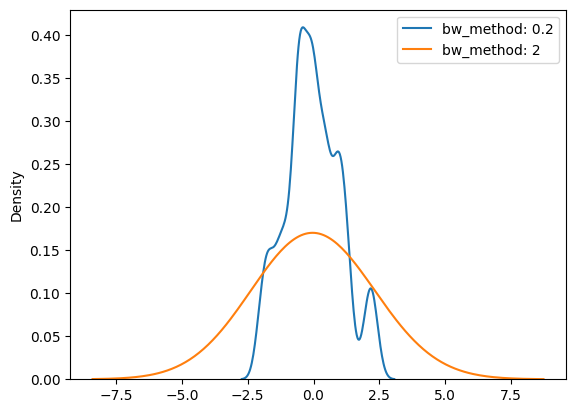

In [33]:
# 在KDE繪製中，也有類似的參數bw可以選擇，以下程式碼顯示選擇不同的寬度所繪製出的圖形不同。
import matplotlib.pyplot as plt
# Plot KDE with specified bandwidth methods
sns.kdeplot(x, bw_method=0.2, label="bw_method: 0.2")
sns.kdeplot(x, bw_method=2, label="bw_method: 2")

plt.legend()

          x         y
0  0.131487 -1.472083
1 -0.469743  1.446779
2 -1.760190 -0.124552
3 -0.479755  0.316207
4 -0.149641  0.186084


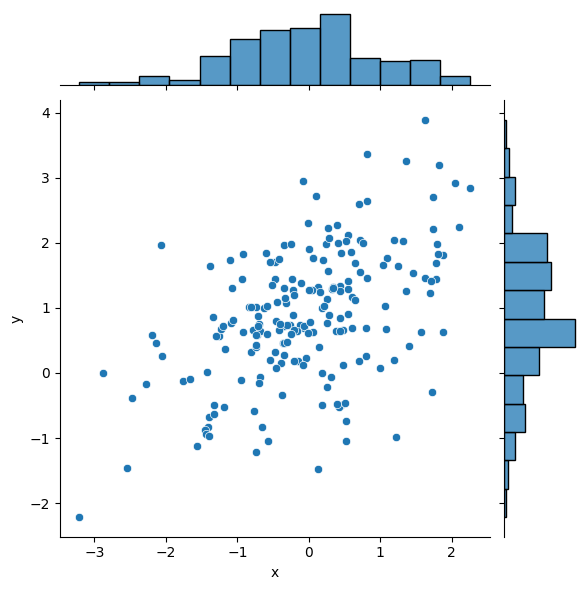

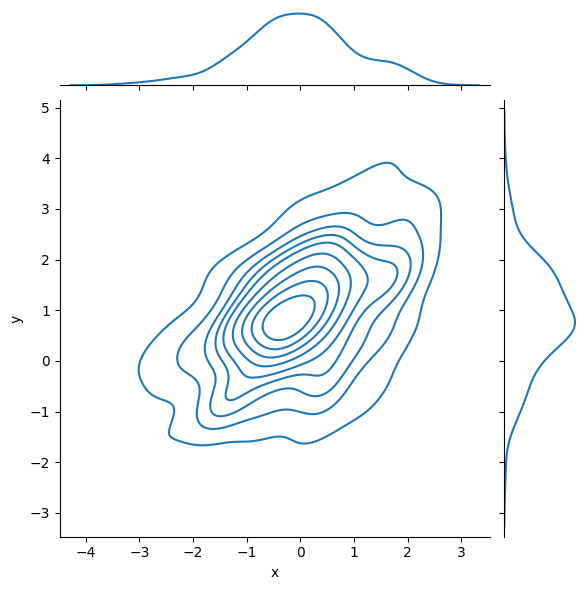

In [36]:
##　繪製雙維度的資料分配
"""
seaborn也提供了jointplot()這個函式來繪製多維度資料的分配情況，如以下程式碼，我們先產生一組(x,y)變數，這組變數服從二維度的多重常態分配，其期望值向量為[0,1]以及兩者間的共變異數為0.5，產生200點(x,y)的樣本點後，用df這個變數存下來，存下來的方式為pandas所提供的資料框物件(DataFrame)。資料框可以想像為一張excel表的抽象物件化，我們用資料框物件的提供的head方法打印出前五行數據。
"""
import pandas as pd
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
print(df.head())
## 使用jointplot來繪製兩變數之間


sns.jointplot(x="x", y="y", data=df)
#ref :https://pyecontech.com/2018/09/30/python_seaborn_visualization/
sns.jointplot(x="x", y="y", data=df, kind="kde");


* 內容
1. 用requests抓取Fred資料庫經濟數據
2. 用pandas以及io讀取抓下來存入內存的csv檔案
3. 繪製非農就業圖表
4. 美國的經濟

In [22]:
# 使用 request 抓取線上csv
import requests 
non_farm_page = requests.get('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=PAYEMS&scale=left&cosd=1939-01-01&coed=2019-11-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2019-12-17&revision_date=2019-12-17&nd=1939-01-01')
# 給定路徑
# Save the text content to a file
with open('non_farm_data.txt', 'w') as f:
    f.write(non_farm_page.text)
    
import pandas as pd
import io
# 儲存在同一支目錄根並讀取　
# non_farm_data = pd.read_csv(io.StringIO(page.text))
# Read the saved text file as a DataFrame
non_farm_data = pd.read_csv('non_farm_data.txt')

# Now  can process the DataFrame as needed
print(non_farm_data.head())

         DATE  PAYEMS
0  1939-01-01   29923
1  1939-02-01   30100
2  1939-03-01   30280
3  1939-04-01   30094
4  1939-05-01   30299


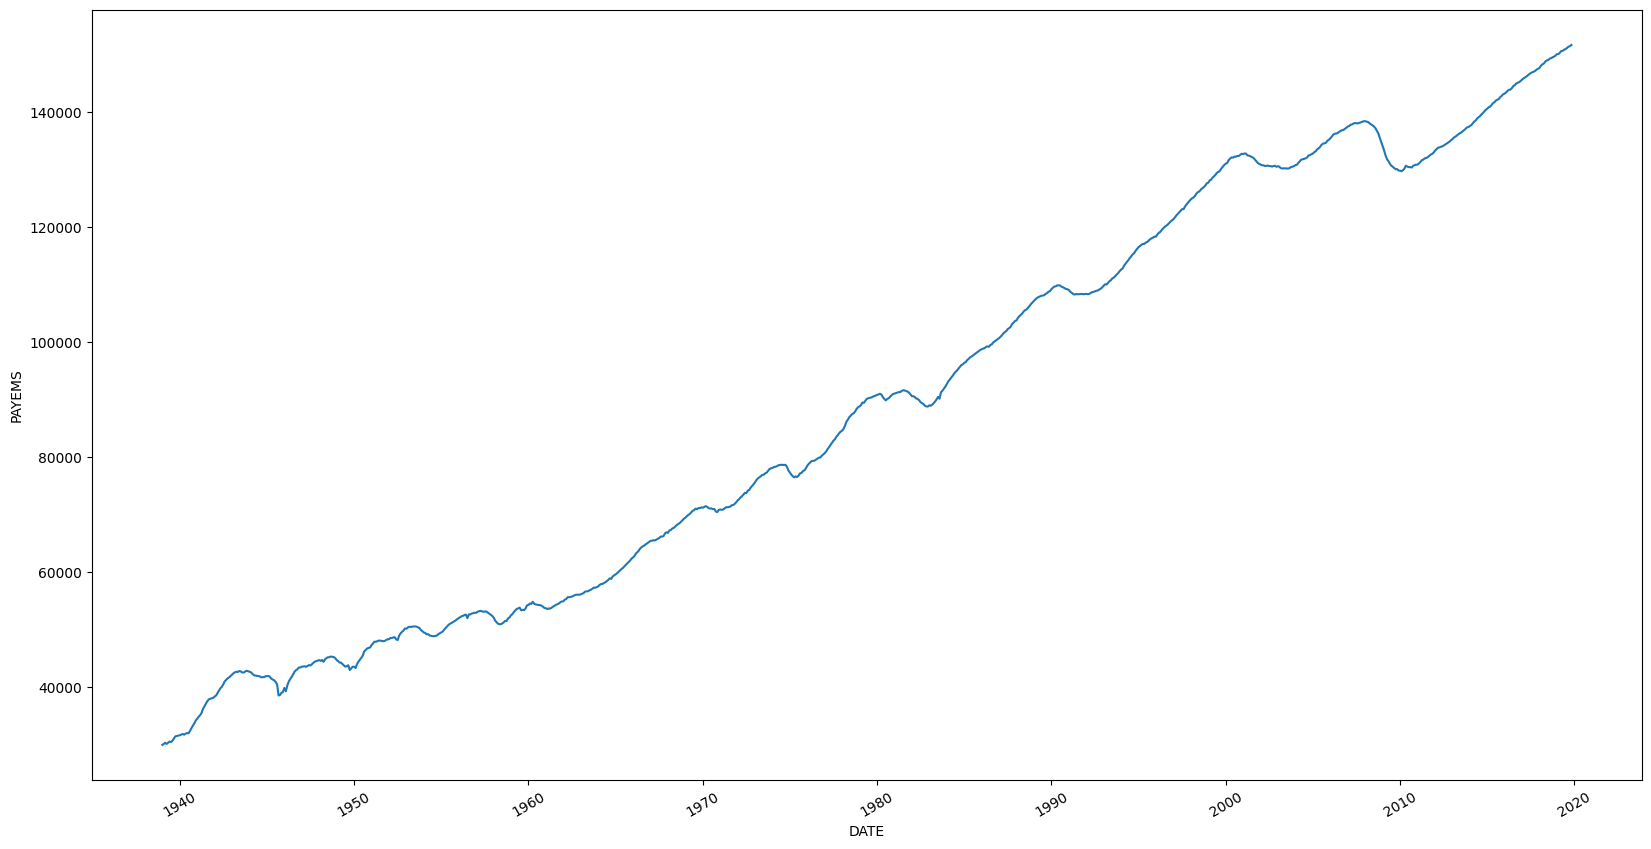

In [23]:
# 非農數據的走勢，要繪製非農就業人數的線圖
import matplotlib.pyplot as plt
non_farm_data['DATE'] = pd.to_datetime(non_farm_data['DATE'])
plt.figure(figsize=(20,10))
sns.lineplot(data=non_farm_data,x='DATE',y='PAYEMS')
plt.xticks(rotation=30)
plt.show()

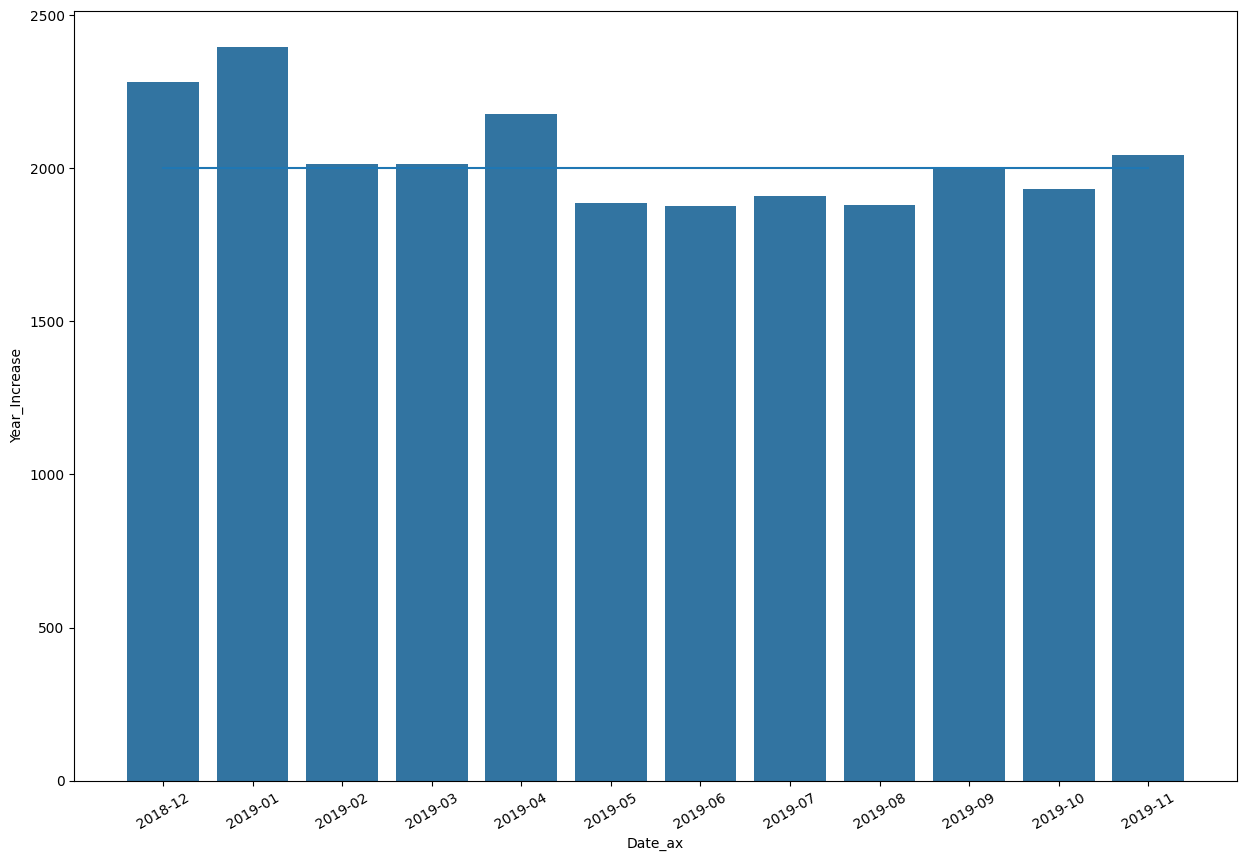

In [24]:
non_farm_data['Year_Increase'] = non_farm_data['PAYEMS'].diff(periods=12)
non_farm_data = non_farm_data.dropna()
non_farm_data['Date_ax'] = non_farm_data['DATE'].dt.strftime('%Y-%m')
plt.figure(figsize=(15,10))
sns.barplot(data=non_farm_data.iloc[-12:],x='Date_ax',y='Year_Increase')
plt.xticks(rotation=30)
plt.plot(non_farm_data['Date_ax'].iloc[-12:].values,12*[2000])
plt.show()

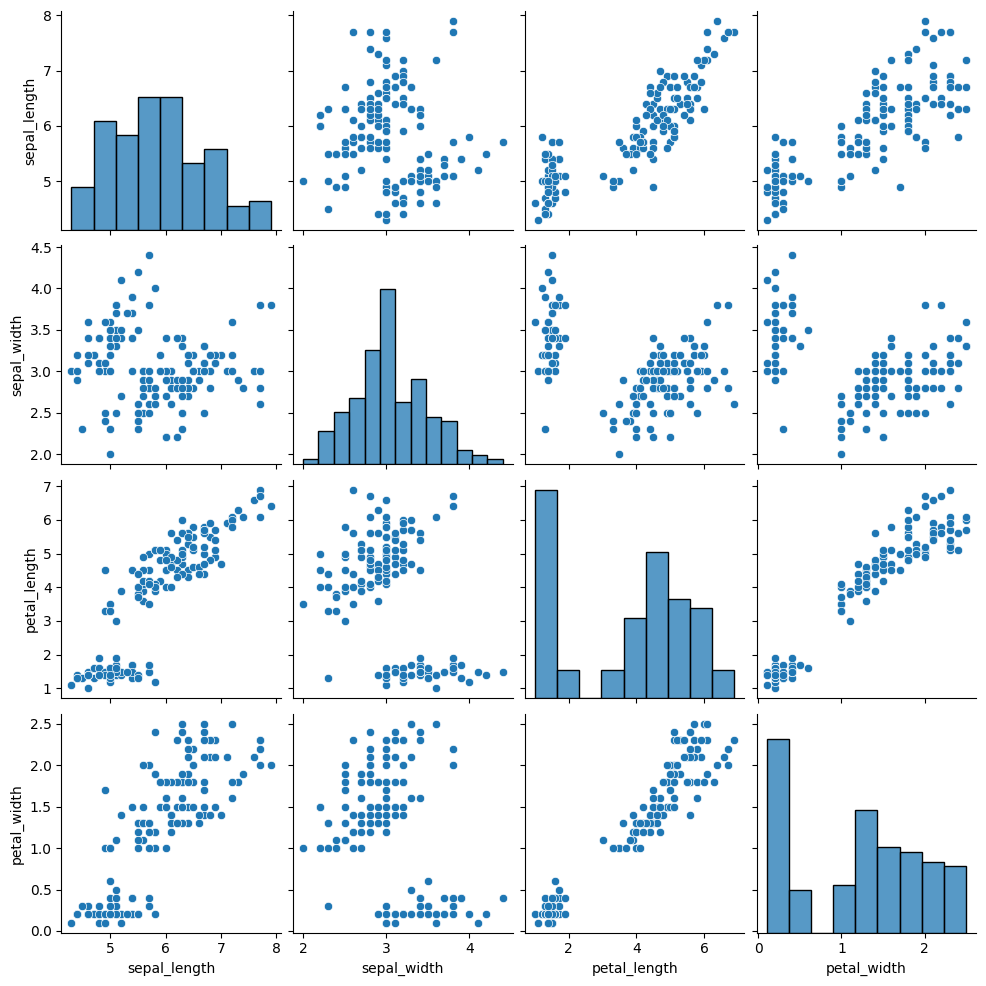

In [25]:
#  直接靠 paiplot 找出關係
iris = sns.load_dataset("iris")
sns.pairplot(iris)